In [3]:
import cv2 as cv 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt


# Question 01 

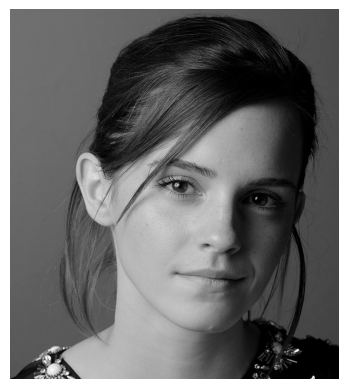

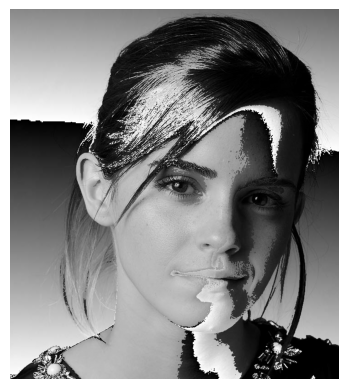

In [6]:
img1 = cv.imread('emma.jpg', cv.IMREAD_GRAYSCALE)
plt.imshow(img1, cmap='gray')
plt.axis('off')  
plt.show()  

img2 = img1.copy() 
 
for i in range(len(img1)):
    for j in range(len(img1[i])):
        if img1[i][j] > 50 and img1[i][j] < 150:
            img2[i][j] = img1[i][j]  + (50 * (i - 50) )/ 100 + 50 
        else:
            img2[i][j] = img1[i][j]
   

plt.imshow(img2, cmap='gray')
plt.axis('off')  # Hide axes
plt.show() 


# Question 2 

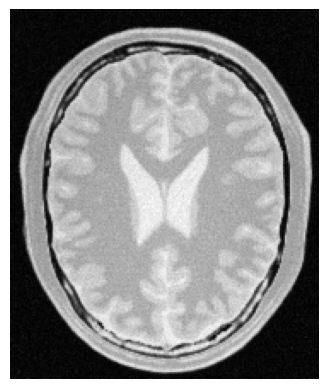

[ 12   7   4   5   9   4   3  40 178 182 153 152 172 163 155 148 151 156
 157 173  37  24 138 211 208 203 186 186 195 192 184 176 152 148 155 163
 156 165 166 165 161 171 156 170 161 181 164 167 152 167 173 162 163 165
 167 158 165 163 160 162 163 157 176 171 151 155 168 171 181 162 184 194
 191 202 211 225 224 227 240 239 235 240 230 244 238 226 234 236 232 223
 206 216 214 239 234 229 230 232 236 227 224 240 234 232 215 225 210 205
 201 200 188 182 164 163 191 177 177 176 170 172 162 169 179 168 174 168
 170 169 168 171 160 168 186 177 168 173 158 163 165 168 163 171 167 169
 169 187 188 190 187 184 187 177 167 165 168 194 192 181 190 195 125  24
   4  56 144 166 165 160 145 154 156 164 195 194 187  98   8  13  14  11
   3]


In [18]:
im3 = cv.imread('brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE  )
plt.imshow(im3, cmap='gray')
plt.axis('off')  # Hide axes
plt.show()

print(im3[115])

white matter


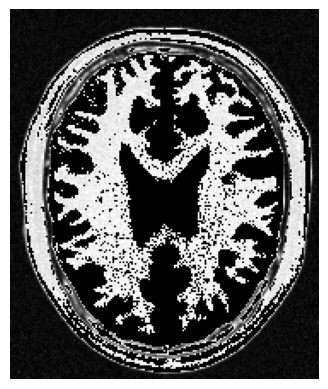

gray matter


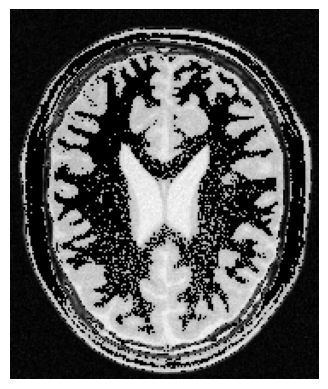

In [30]:
#White matter 
white_matter = im3.copy()
gray_matter = im3.copy()
for i in range(len(im3)):
    for j in range(len(im3[i])):
        if im3[i][j] < 175 and im3[i][j] > 125:
            gray_matter[i][j] = 0
        else:
            gray_matter[i][j] = im3[i][j]
        if im3[i][j] > 175:
            white_matter[i][j] = 0
        else:
            white_matter[i][j] = im3[i][j]
print("white matter")
plt.imshow(white_matter, cmap='gray')

plt.axis('off')  # Hide axes    
plt.show()

print("gray matter" )
plt.imshow(gray_matter, cmap='gray')
plt.axis('off')  # Hide axes    
plt.show()